![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

Grecia Pacheco Castellanos A01366730

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/SemestreTec/COLAB-SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/SemestreTec/COLAB-SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 25.1 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=b0c9a9d932bcadb6ad088bf0320022b66e1a05729642c1ad308babe7b2c61c46
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
%%writefile .authinfo
oda user A01366730@tec.mx password Ohlnz1D*knesn

Overwriting .authinfo


Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 353



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/SemestreTec/COLAB-SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_workEFA4000024FE_odaws04-usw2.oda.sas.com/SAS_work4AB6000024FE_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 9470


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Sunday, December  4, 2022 02:50:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Sunday, December  4, 2022 02:50:00 PM

33         


For local Jupyter

In [10]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [12]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")

data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
373974,2373975.0,HURLBURT,MARC,0.0,20.0,45400.0,University / College,City,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
913660,2913661.0,DAVIS,LILLIAN,1.0,25.0,195400.0,University / College,City,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Understanding data
This part is neccesary to understand the problem and the variables provided in order to realice the correct data transformation for a better model training.


In [13]:
to_delete = ["ID", "LastName","FirstName","TotalGift"]
data_merge= data_merge.drop(columns=to_delete)
data_merge.head()

,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
0,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,10.0,1000.0,0.0,0.0,1.0,0.0,0.0
1,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0
2,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
4,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [14]:
data_merge.describe()

,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,43.130251,85.897932,0.122101,7.673015,0.1,0.149457,9.409665
std,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,150.249476,283.581066,0.327403,82.224854,0.3,0.356539,90.917731
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,15.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,20.000000,30.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,30.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,10000.000000,10000.000000,1.000000,10000.000000,1.0,1.000000,10000.000000


In [15]:
NUMERICS = ('int16', 'int32', 'int64', 'float16', 'float32', 'float64')

data_merge.select_dtypes(include = NUMERICS).describe().T


,count,mean,std,min,25%,50%,75%,max
Woman,1000000.0,0.516936,0.499713,0.0,0.0,1.0,1.0,1.0
Age,1000000.0,46.366170,18.945324,16.0,30.0,46.0,61.0,90.0
Salary,1000000.0,65531.654000,61051.122343,0.0,20700.0,44000.0,91200.0,250000.0
SeniorList,1000000.0,4.582967,3.325844,0.0,2.0,4.0,7.0,10.0
NbActivities,1000000.0,0.561413,0.996803,0.0,0.0,0.0,1.0,10.0
Referrals,1000000.0,0.560556,1.054027,0.0,0.0,0.0,1.0,16.0
Recency,336334.0,3.039636,2.120722,1.0,1.0,2.0,4.0,10.0
Frequency,336334.0,1.666882,1.052090,1.0,1.0,1.0,2.0,10.0
Seniority,336334.0,4.474148,2.588119,1.0,2.0,4.0,6.0,10.0
MinGift,336334.0,43.130251,150.249476,10.0,15.0,20.0,30.0,10000.0


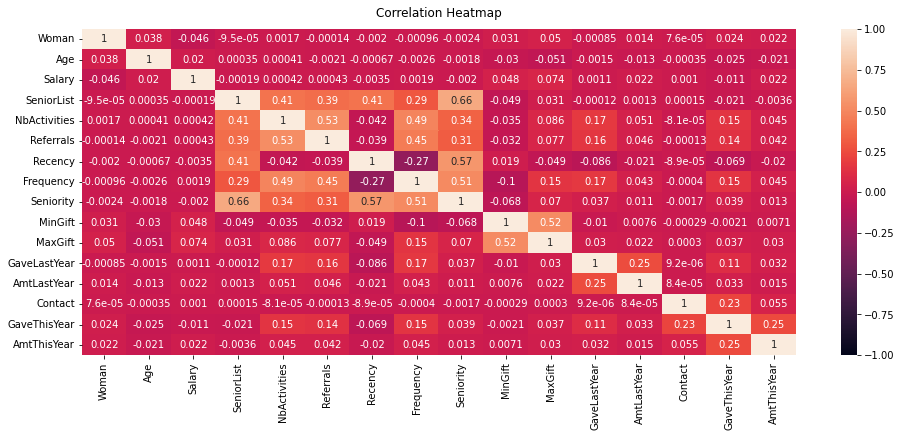

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_merge.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

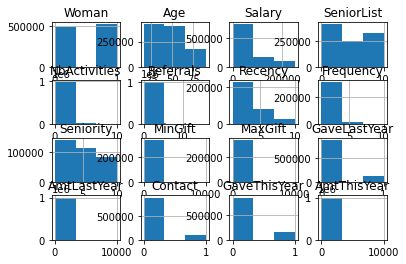

In [17]:
hists = data_merge.hist(bins=3)

## Treating Missing Values

Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [18]:
#Libraries
import math

In [19]:
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=data_merge['MaxGift'].median())


In [20]:
# For non specific numerical data we are filling with  the mean

data_merge[['Recency']] = data_merge[['Recency']].fillna(math.floor(data_merge['Recency'].mean()))  
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(math.floor(data_merge['Frequency'].mean()))  
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(math.floor(data_merge['Seniority'].mean()))  
data_merge[['Referrals']] = data_merge[['Referrals']].fillna(math.floor(data_merge['Referrals'].mean()))

In [21]:
# For categorical data we are filling with the mode 

data_merge[['City']] = data_merge[['City']].fillna(value="City")  
data_merge= pd.get_dummies(data_merge, columns= ['City'])

In [22]:
data_merge[['Education']] = data_merge[['Education']].fillna(value="University / College")  
data_merge= pd.get_dummies(data_merge, columns= ['Education'])

## Normalization

In [23]:
from sklearn import preprocessing

x_scale = preprocessing.scale(data_merge)

In [24]:
df = pd.DataFrame(x_scale, columns = data_merge.columns)

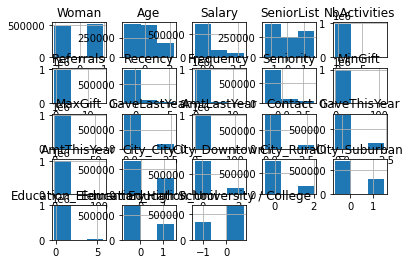

In [25]:
hists = df.hist(bins=3)

## Duplicates and outliers

In [26]:
# Removing duplicates
data_merge= data_merge.drop_duplicates()
data_merge.shape

(990059, 23)

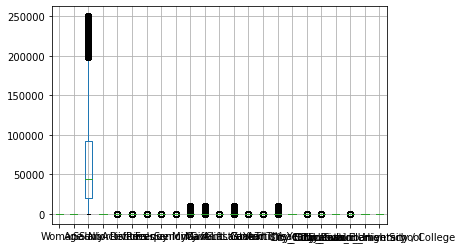

In [27]:
data_merge.boxplot()


In [28]:
# Function to identify and remove outliers
def outliers(col):
  global data_merge
  percentile25 = data_merge[col].quantile(0.25)
  percentile75 = data_merge[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  data_merge[data_merge[col] > upper_limit]
  data_merge[data_merge[col] < lower_limit]
  data_merge = data_merge[data_merge[col] < upper_limit]
  

In [29]:
col_names= ['Salary']
for i in col_names:
  outliers(i)
data_merge.shape

(932871, 23)

## Feature Selection

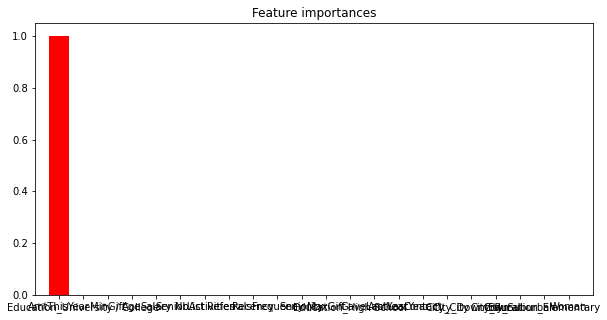

In [32]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np


to_delete = ["GaveThisYear"]
X= data_merge.drop(columns=to_delete)
y =  data_merge['GaveThisYear']

sel = SelectFromModel(DecisionTreeRegressor(max_depth=3))
sel.fit(X, y)

importances = sel.estimator_.feature_importances_
names = sel.estimator_.feature_names_in_

indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [names[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

## Data Partition

In [35]:
# The code below is an illustration on how to sample data on train and validation samples.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.2, random_state=1) 

#train.head()
train.sample(2)

,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,MinGift,...,Contact,GaveThisYear,AmtThisYear,City_City,City_Downtown,City_Rural,City_Suburban,Education_Elementary,Education_High School,Education_University / College
471992,1.0,31.0,137500.0,7.0,2.0,1.0,7.0,1.0,7.0,30.0,...,0.0,0.0,0.0,0,1,0,0,0,0,1
556634,1.0,40.0,61600.0,4.0,0.0,1.0,3.0,1.0,4.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,1


# Prebuilt Models

The sk-learn library offers more advanced models. 

sk-learn library: https://scikit-learn.org/stable/index.html  



In [36]:
X_train = train[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'GaveLastYear','Contact', 'Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

## Model Training and Optimization

### Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression


regr = LogisticRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [38]:
#you can change the criteria

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_valid, regr_predict)
print(confusion_matrix)

[[158392      2]
 [ 28179      2]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, regr_predict))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    158394
         1.0       0.50      0.00      0.00     28181

    accuracy                           0.85    186575
   macro avg       0.67      0.50      0.46    186575
weighted avg       0.80      0.85      0.78    186575



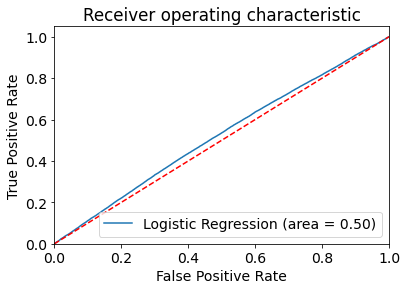

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, regr.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, regr.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier

X_train = train[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

DT_model = DecisionTreeClassifier(max_depth=5,criterion="entropy").fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

[0.22526164 0.16096263 0.07943787 ... 0.22526164 0.16096263 0.07943787]


In [42]:
print(DT_predict_proba)

[[0.77473836 0.22526164]
 [0.83903737 0.16096263]
 [0.92056213 0.07943787]
 ...
 [0.77473836 0.22526164]
 [0.83903737 0.16096263]
 [0.92056213 0.07943787]]


In [43]:
#you can change the criteria
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)


[[156397   1997]
 [ 24949   3232]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    158394
         1.0       0.62      0.11      0.19     28181

    accuracy                           0.86    186575
   macro avg       0.74      0.55      0.56    186575
weighted avg       0.83      0.86      0.81    186575



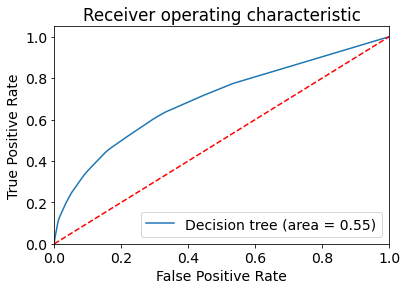

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

#### Optimization

In [46]:
"""
from sklearn import datasets, decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (GridSearchCV, KFold, cross_validate,
                                     train_test_split)

to_delete = ["AmtThisYear"]
X= data_merge.drop(columns=to_delete)
y =  data_merge['AmtThisYear']

pca = decomposition.PCA()
dt_model = DecisionTreeClassifier()
pipe = Pipeline(steps=[('pca', pca), ('dt', dt_model)])
n_components = list(range(1,X.shape[1]+1,1))

params = {'pca__n_components' : n_components,
          'dt__max_depth': list(range(1,10))+[None], 
          'dt__min_samples_leaf' : range(1,10),
          'dt__min_samples_split': [1, 2, 3] + np.arange(0.1, 0.9, 0.1).tolist(),
          'dt__criterion' : ['gini', 'entropy'],
          'dt__max_features' : list(range(1,10,1))+[None]
        }
kfold = KFold(n_splits=3, random_state=10, shuffle=True) 
scores = ['recall', 'precision', 'f1']
for score in scores:
    print(f"Tuning for {score}")    
    clf = GridSearchCV(
        pipe, params,
        cv = kfold,
        n_jobs = -1, 
        scoring = f'{score}_macro',
        verbose = 0,
        refit = True)
    clf.fit(X_train,Y_train)
    print(clf.best_params_)
    print(clf.best_score_, '\n\n')
    pipe =  clf.best_estimator_



print("FINAL")
print(clf.best_params_)
print(clf.best_score_)"""

'\nfrom sklearn import datasets, decomposition\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import (GridSearchCV, KFold, cross_validate,\n                                     train_test_split)\n\nto_delete = ["AmtThisYear"]\nX= data_merge.drop(columns=to_delete)\ny =  data_merge[\'AmtThisYear\']\n\npca = decomposition.PCA()\ndt_model = DecisionTreeClassifier()\npipe = Pipeline(steps=[(\'pca\', pca), (\'dt\', dt_model)])\nn_components = list(range(1,X.shape[1]+1,1))\n\nparams = {\'pca__n_components\' : n_components,\n          \'dt__max_depth\': list(range(1,10))+[None], \n          \'dt__min_samples_leaf\' : range(1,10),\n          \'dt__min_samples_split\': [1, 2, 3] + np.arange(0.1, 0.9, 0.1).tolist(),\n          \'dt__criterion\' : [\'gini\', \'entropy\'],\n          \'dt__max_features\' : list(range(1,10,1))+[None]\n        }\nkfold = KFold(n_splits=3, random_state=10, shuffle=True) \nscores = [\'recall\', \'precision\', \'f1\']\nfor score in scores:\n    pr

In [47]:
best_model = DecisionTreeClassifier(criterion="gini", max_depth=8, max_features=4, min_samples_leaf = 8, min_samples_split = 2)
best_model = best_model.fit(X_train,Y_train)

print("\n Train")
y_predicted = best_model.predict(X_train)
print("score: ", best_model.score(X_train, Y_train))
print(classification_report(Y_train,y_predicted))

print("\n Test")
y_predicted = best_model.predict(X_valid)
print("score : ",best_model.score(X_valid,Y_valid))
print(classification_report(Y_valid,y_predicted))


 Train
score:  0.8551580070106232
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    633128
         1.0       0.62      0.12      0.20    113168

    accuracy                           0.86    746296
   macro avg       0.74      0.55      0.56    746296
weighted avg       0.83      0.86      0.81    746296


 Test
score :  0.8554629505560767
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    158394
         1.0       0.61      0.12      0.19     28181

    accuracy                           0.86    186575
   macro avg       0.74      0.55      0.56    186575
weighted avg       0.83      0.86      0.81    186575



### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predictions = knn.predict_proba(X_valid)[:, 1]


## Scoring New Data

### Prepare data for scoring

In [50]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [51]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_contact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
DT_predict_contact=best_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.249651
1,2000002.0,0.713147
2,2000003.0,0.619780
3,2000004.0,0.371364
4,2000005.0,0.511639


### Predict 'probability of giving' for members who were not contacted

In [52]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_nocontact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
DT_predict_nocontact=best_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.122997
1,2000002.0,0.099652
2,2000003.0,0.078963
3,2000004.0,0.078963
4,2000005.0,0.078963


In [53]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
853791,2853792.0,0.615946,0.078963
989721,2989722.0,0.511639,0.078963
275954,2275955.0,0.334824,0.139018
971132,2971133.0,0.615946,0.078963
776867,2776868.0,0.231746,0.170914
934881,2934882.0,0.615946,0.078963
371659,2371660.0,0.223282,0.103081
642584,2642585.0,0.304360,0.078963
229855,2229856.0,0.615946,0.084865
832017,2832018.0,0.286448,0.103081


## Exporting Results to a CSV File

In [54]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [55]:
import pandas as pd

NB = 10000

probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [56]:
# Export the final csv file

submission = raw_submission.head(NB)

submission.to_csv('DT2Round2Outputfinal.csv', index=False)


In [57]:
!head Round2\ Output\ final.csv

ID,ProbContact,ProbNoContact,AmtContact,AmtNoContact,Uplift
2347623.0,0.9487179487179488,0.1783024628536535,25142.729153587232,25147.67913319941,19369.465303259363
2074508.0,0.8135338345864662,0.1656749285480017,27896.06631214436,27901.01629175654,18071.89491624375
2371231.0,0.8135338345864662,0.1888592140404426,27896.41358414463,27901.36356375681,17425.246721011412
2598571.0,0.8135338345864662,0.1656749285480017,22329.432631429878,22334.38261104205,14465.501709539192
2555917.0,0.9487179487179488,0.2408477842003853,19587.381945867903,19592.33192548008,13864.131088868433
2787549.0,0.8135338345864662,0.1656749285480017,19540.659924321997,19545.60990393417,12658.770474322353
2100799.0,0.7330779054916986,0.2849718492854049,27899.1839379149,27904.13391752708,12500.382680949013
2525607.0,0.8135338345864662,0.1888592140404426,19544.830937326176,19549.780916938354,12208.22500015134
2167698.0,0.6796536796536796,0.2744400251203684,27909.196407595107,27914.146387207285,11307.82899888046
